# Importation et Chargement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour que les graphiques soient jolis
sns.set_theme(style="whitegrid")

# Chargement des données
df = pd.read_csv('social_posts.csv')

# On dit à Python que la colonne 'date' contient des dates (et pas juste du texte)
df['date'] = pd.to_datetime(df['date'])

# Afficher les 5 premières lignes
df.head()

,post_id,date,platform,content_type,likes,comments,shares,reach,impressions
0,1,2025-01-15 09:00:00,Instagram,carousel,450,23,12,8500,12000
1,2,2025-01-15 14:00:00,Facebook,image,320,15,8,6200,9500
2,3,2025-01-15 18:00:00,LinkedIn,article,180,42,25,5400,7800
3,4,2025-01-16 10:00:00,Instagram,reel,890,67,45,15000,22000
4,5,2025-01-16 13:00:00,Twitter,text,210,34,56,7800,11000


## Calcul du Taux d'Engagement

In [2]:
# 1. Calcul des interactions totales
df['interactions'] = df['likes'] + df['comments'] + df['shares']

# 2. Calcul du taux d'engagement (%)
df['engagement_rate'] = (df['interactions'] / df['reach']) * 100

# Afficher les statistiques globales
print("=== RAPPORT DE PERFORMANCE ===")
print(f"Engagement Moyen : {df['engagement_rate'].mean():.2f}%")
print(f"Total des Impressions : {df['impressions'].sum()}")

# Afficher les 3 posts qui ont le mieux marché
print("\n--- Top 3 des Posts ---")
top_posts = df.sort_values(by='engagement_rate', ascending=False).head(3)
display(top_posts[['date', 'platform', 'content_type', 'engagement_rate']])

=== RAPPORT DE PERFORMANCE ===
Engagement Moyen : 5.67%
Total des Impressions : 437000

--- Top 3 des Posts ---


,date,platform,content_type,engagement_rate
13,2025-01-19 16:00:00,Instagram,reel,7.437838
7,2025-01-17 12:00:00,Facebook,video,6.963636
20,2025-01-21 19:00:00,Facebook,video,6.949153


# Analyse Temporelle (Meilleures Heures)

In [3]:
# On extrait l'heure de chaque post (ex: 14h, 19h...)
df['hour'] = df['date'].dt.hour

# On calcule la moyenne d'engagement pour chaque heure
hourly_stats = df.groupby('hour')['engagement_rate'].mean().reset_index()

# On trie pour voir la meilleure heure en premier
best_hours = hourly_stats.sort_values(by='engagement_rate', ascending=False)

print("--- Performance par Heure ---")
print(best_hours)

--- Performance par Heure ---
    hour  engagement_rate
9     16         7.437838
4     11         6.793939
3     10         6.651728
8     15         6.259217
10    17         6.128971
5     12         6.102189
0      7         5.791209
11    18         5.579273
13    20         5.529112
7     14         5.422043
12    19         5.387620
1      8         5.303771
2      9         4.869323
6     13         4.806833
14    21         3.830769


# Visualisation 

C:\Users\monpc\AppData\Local\Temp\ipykernel_9756\1842159606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='platform', y='engagement_rate', palette='viridis', ax=axes[0])


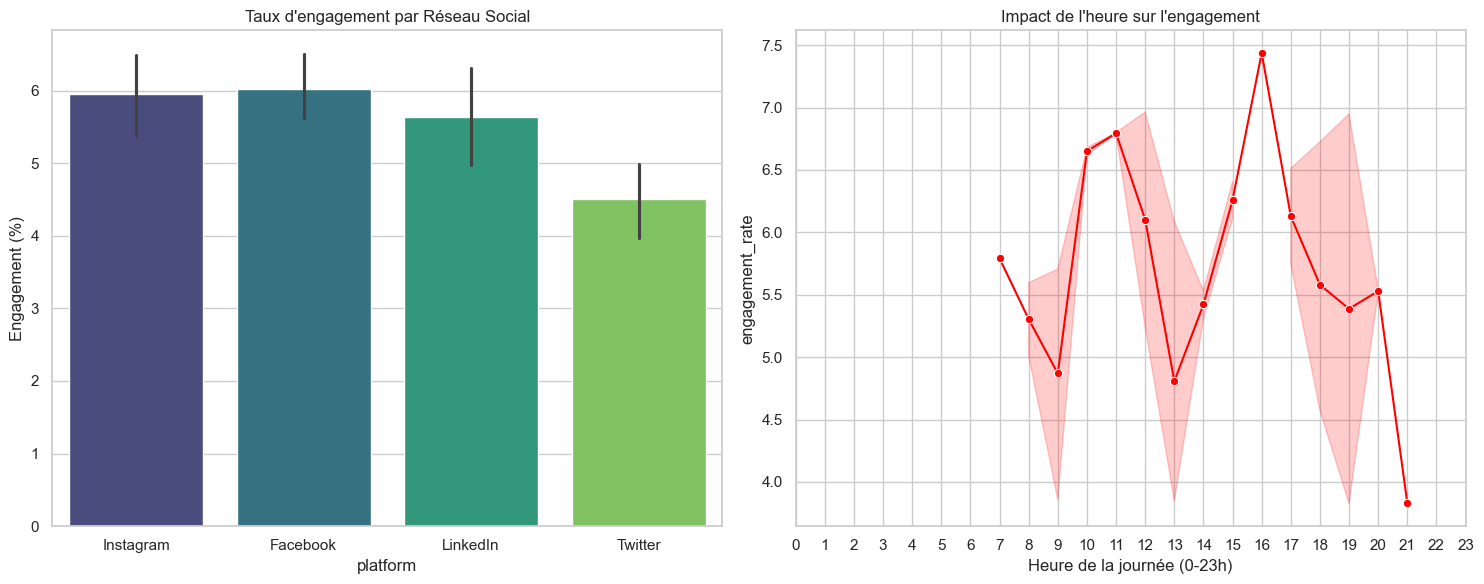

In [4]:
# Création d'une figure avec 2 graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique 1 : Quel réseau social est le plus performant ? (Barplot)
sns.barplot(data=df, x='platform', y='engagement_rate', palette='viridis', ax=axes[0])
axes[0].set_title('Taux d\'engagement par Réseau Social')
axes[0].set_ylabel('Engagement (%)')

# Graphique 2 : À quelle heure poster ? (Lineplot)
sns.lineplot(data=df, x='hour', y='engagement_rate', marker='o', color='red', ax=axes[1])
axes[1].set_title('Impact de l\'heure sur l\'engagement')
axes[1].set_xlabel('Heure de la journée (0-23h)')
axes[1].set_xticks(range(0, 24)) # Afficher toutes les heures
axes[1].grid(True)

plt.tight_layout()
plt.show()